In [1]:
# Illustration of possible behaviors of variational EM
# Author : Aleyna Kara
# This file is generated from varEMbound.m


import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

try:
    from probml_utils import savefig, latexify, is_latexify_enabled
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify, is_latexify_enabled

In [2]:
latexify(width_scale_factor=2, fig_height=1.5)

/home/madhav/.local/lib/python3.8/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [3]:
def logist(x, k):
    return 1 / (1 + jnp.exp(-k * x))


def logist_gauss(x, k, mu, sigma):
    return 1 / (1 + jnp.exp(-k * x)) + (1 / (2 * jnp.pi * sigma)) * jnp.exp(-((x - mu) ** 2) / (sigma**2))


def plot_var_em_bound(x, true_log_ll, lower_bound, title):

    plt.plot(x, true_log_ll, "-b", linewidth=3, label="true log-likelihood")

    plt.plot(x, lower_bound, ":r", linewidth=3, label="lower bound")

    plt.xlim([0, 4])
    plt.ylim([0.5, jnp.max(y1) + 0.05])
    plt.xlabel("training time")
    plt.xticks()
    plt.yticks()
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.legend(loc="lower right")
    savefig(f"{title}.pdf", dpi=300)
    plt.show()

In [4]:
n = 41
x = jnp.linspace(0, 4, n)
k, mu, sigma = 2, 1, 0.9

/home/madhav/.local/lib/python3.8/site-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


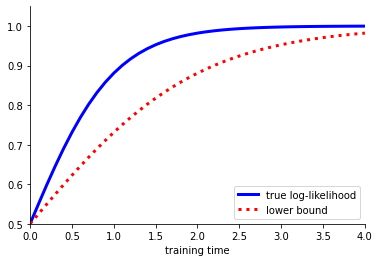

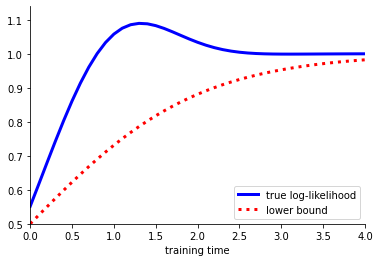

In [5]:
y1 = logist(x, k)
lower_bound = logist(x, 1)
plot_var_em_bound(x, y1, lower_bound, "varEMbound1")
y1 = logist_gauss(x, k, mu, sigma)
plot_var_em_bound(x, y1, lower_bound, "varEMbound2")